In [1]:
%matplotlib inline

# Gear shifts on track

Plot which gear is being used at which point of the track


Import FastF1 and load the data



In [28]:
import fastf1
#import fastf1 as ff1
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


fastf1.Cache.enable_cache('D:\Data analyst\Jedha\Projet\Projet F1\doc_cache')  # replace with your cache directory

session = fastf1.get_session(2021, 'Austrian Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

Loading data for Austrian Grand Prix - Qualifying [v2.2.8]
Using cached data for driver_info
Using cached data for timing_data
Using cached data for timing_app_data
Processing timing data...
Using cached data for session_status_data
Using cached data for track_status_data
Using cached data for car_data
Using cached data for position_data
Using cached data for weather_data
Using cached data for race_control_messages
Finished loading data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '5', '63', '18', '55', '16', '3', '14', '99', '7', '31', '6', '47', '9']


Prepare the data for plotting by converting it to the appropriate numpy
data types



In [29]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

Create a line collection. Set a segmented colormap and normalize the plot
to full integer values of the colormap



In [30]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

Create the plot



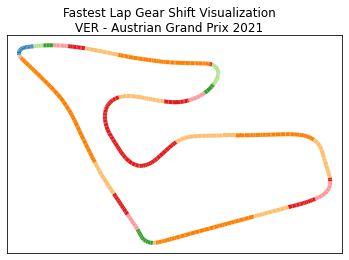

In [31]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)


Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they
are centered for each color segment.



C:\Users\clefe\AppData\Local\Temp/ipykernel_19964/3174691261.py:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))


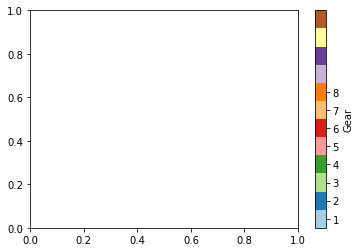

In [32]:
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

In [39]:
schedule = fastf1.get_event_schedule(2022)
schedule

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,0,Spain,Spain,FORMULA 1 PRE-SEASON TRACK SESSION 2022,2022-02-25 18:00:00,Pre-Season Track Session,testing,Practice 1,2022-02-23 09:00:00,Practice 2,2022-02-24 09:00:00,Practice 3,2022-02-25 09:00:00,None,NaT,None,NaT,False
1,0,Bahrain,Bahrain,FORMULA 1 ARAMCO PRE-SEASON TESTING 2022,2022-03-12 19:00:00,Pre-Season Test,testing,Practice 1,2022-03-10 10:00:00,Practice 2,2022-03-11 10:00:00,Practice 3,2022-03-12 10:00:00,None,NaT,None,NaT,True
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
7,6,Spain,Barcelona,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,2022-05-22 17:00:00,Spanish Grand Prix,conventional,Practice 1,2022-05-20 14:00:00,Practice 2,2022-05-20 17:00:00,Practice 3,2022-05-21 13:00:00,Qualifying,2022-05-21 16:00:00,Race,2022-05-22 15:00:00,True
8,7,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2022,2022-05-29 17:00:00,Monaco Grand Prix,conventional,Practice 1,2022-05-27 14:00:00,Practice 2,2022-05-27 17:00:00,Practice 3,2022-05-28 13:00:00,Qualifying,2022-05-28 16:00:00,Race,2022-05-29 15:00:00,True
9,8,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,2022-06-12 17:00:00,Azerbaijan Grand Prix,conventional,Practice 1,2022-06-10 15:00:00,Practice 2,2022-06-10 18:00:00,Practice 3,2022-06-11 15:00:00,Qualifying,2022-06-11 18:00:00,Race,2022-06-12 15:00:00,True
